Build a regression model.

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('poi_count.tsv', sep='\t')

In [16]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df.head(5)

,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,timestamp,foursquare_num_poi,Yelp_poi_count
0,Toronto,Queen St E / Woodward Ave,12,19,5,0,43.665269,-79.319796,2023-06-05T15:38:08.527000Z,0,178
1,Toronto,Primrose Ave / Davenport Rd,12,15,3,0,43.671420,-79.445947,2023-06-05T15:38:08.527000Z,0,144
2,Toronto,Queen St. E / Rhodes Ave.,13,23,10,0,43.666224,-79.317693,2023-06-05T15:38:08.528000Z,0,157
3,Toronto,Bond St / Queen St E,8,25,16,0,43.653236,-79.376716,2023-06-05T15:38:08.533000Z,0,1317
4,Toronto,Church St / Alexander St,12,15,2,0,43.663722,-79.380288,2023-06-05T15:38:08.534000Z,0,1004


In [14]:
df.shape

(663, 13)

In [11]:
num_feats = df.dtypes[df.dtypes != object].index.tolist()

In [12]:
# descriptive stats
df[num_feats].describe()

,empty_slots,slots,free_bikes,ebikes,latitude,longitude,foursquare_num_poi,Yelp_poi_count
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.0,663.000000
mean,10.491704,18.882353,8.006033,0.150830,43.667176,-79.393309,0.0,418.322775
std,7.040850,6.296887,7.373503,0.876788,0.029916,0.057880,0.0,384.321737
min,0.000000,0.000000,0.000000,0.000000,43.588077,-79.544491,0.0,0.000000
25%,5.000000,15.000000,2.000000,0.000000,43.648685,-79.425058,0.0,130.000000
50%,11.000000,19.000000,6.000000,0.000000,43.661547,-79.393249,0.0,286.000000
75%,15.000000,22.000000,13.000000,0.000000,43.678361,-79.368560,0.0,595.500000
max,44.000000,57.000000,46.000000,14.000000,43.788319,-79.123505,0.0,1653.000000


In [11]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                663 non-null    object 
 1   station_name        663 non-null    object 
 2   empty_slots         663 non-null    int64  
 3   slots               663 non-null    int64  
 4   free_bikes          663 non-null    int64  
 5   ebikes              663 non-null    int64  
 6   latitude            663 non-null    float64
 7   longitude           663 non-null    float64
 8   timestamp           663 non-null    object 
 9   foursquare_num_poi  663 non-null    int64  
 10  Yelp_poi_count      663 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 57.1+ KB


In [12]:
# check for duplicates for Id
nameUnique = len(set(df.station_name))
nameTotal = df.shape[0]
namedupe = nameTotal - nameUnique
print(namedupe)


0


Provide model output and an interpretation of the results. 

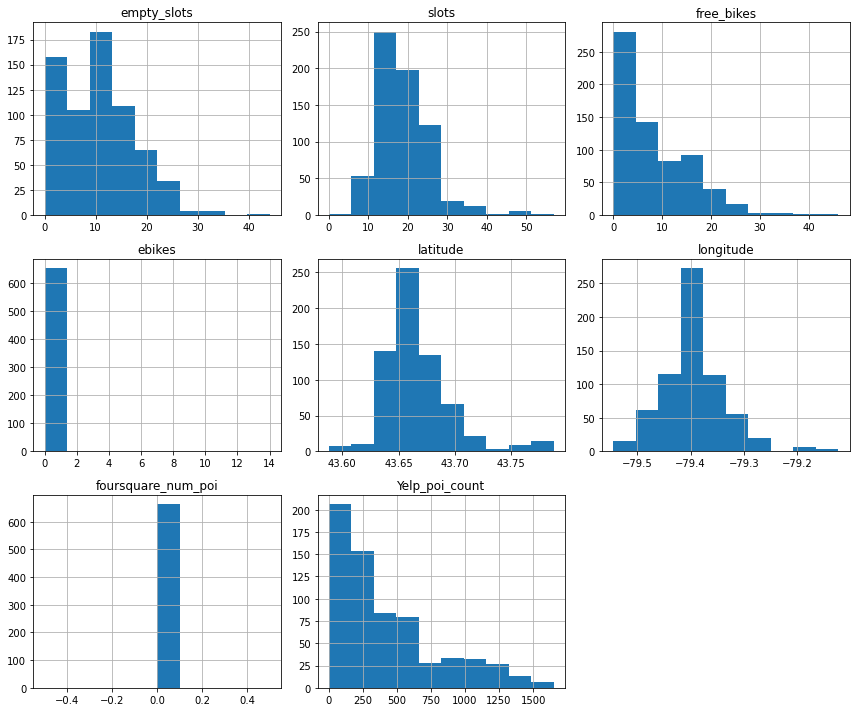

In [22]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [14]:
print(list(df.columns))

['city', 'station_name', 'empty_slots', 'slots', 'free_bikes', 'ebikes', 'latitude', 'longitude', 'timestamp', 'foursquare_num_poi', 'Yelp_poi_count']


In [26]:
df_visual = df.drop(['latitude','longitude','foursquare_num_poi','timestamp'],axis=1)
df_visual

,city,station_name,empty_slots,slots,free_bikes,ebikes,Yelp_poi_count
0,Toronto,Queen St E / Woodward Ave,12,19,5,0,178
1,Toronto,Primrose Ave / Davenport Rd,12,15,3,0,144
2,Toronto,Queen St. E / Rhodes Ave.,13,23,10,0,157
3,Toronto,Bond St / Queen St E,8,25,16,0,1317
4,Toronto,Church St / Alexander St,12,15,2,0,1004
...,...,...,...,...,...,...,...
658,Toronto,Lynn William St / Pirandello St,17,17,0,0,386
659,Toronto,Bay St / Queens Quay W (Ferry Terminal),5,34,28,0,434
660,Toronto,College St / Huron St,0,18,16,0,506
661,Toronto,Ossington Ave / Bruce St,10,15,4,0,538


Text(0.5, 1.0, 'correlation heatmap')

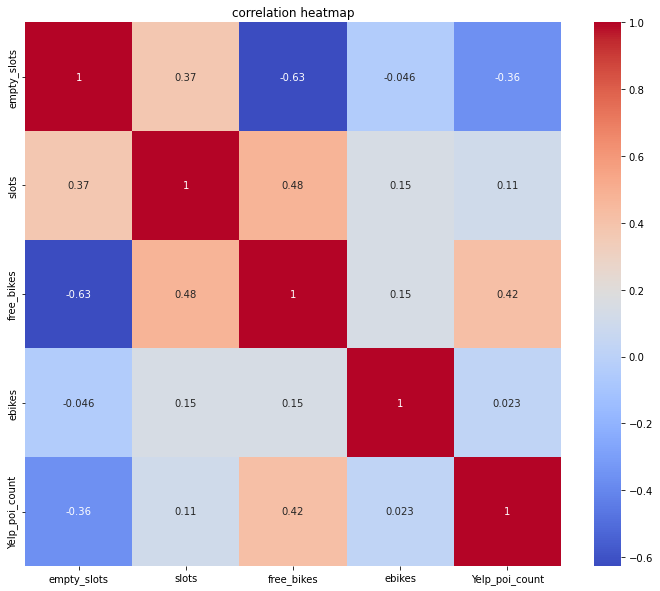

In [28]:
# correlation matrix 
correlation_matrix = df_visual.corr()
#f, ax = plt.plots(figsize=(12,9))
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

plt.title('correlation heatmap')

In [71]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
num_feats.remove('latitude')
num_feats.remove('longitude')
num_feats.remove('Yelp_poi_count')

In [45]:
num_feats

['empty_slots', 'slots', 'free_bikes', 'ebikes']

In [46]:
x = df[num_feats]
y = df['Yelp_poi_count']

In [52]:
x_cost = sm.add_constant(x) # adding a constant 
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Yelp_poi_count   R-squared (uncentered):                   0.600
Model:                            OLS   Adj. R-squared (uncentered):              0.597
Method:                 Least Squares   F-statistic:                              246.9
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                   1.82e-129
Time:                        19:22:24   Log-Likelihood:                         -4841.9
No. Observations:                 663   AIC:                                      9692.
Df Residuals:                     659   BIC:                                      9710.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

/Users/siyimo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


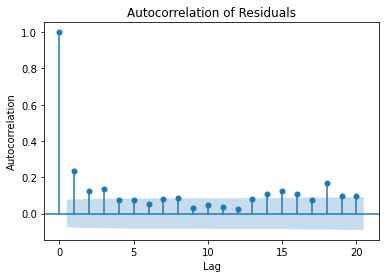

In [58]:
# check assumptions

residuals = model.resid

# check for independence of residuals
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Residuals')
plt.show()

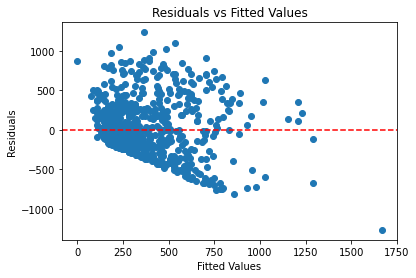

In [59]:
# check for homoscedasticity with residual plot
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0,color='red',linestyle='dashed')
plt.show()

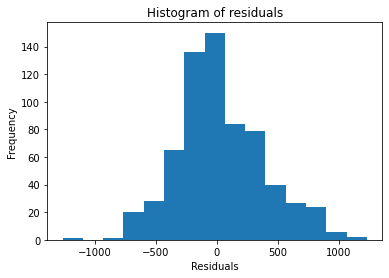

In [60]:
plt.hist(residuals,bins=15)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

In [61]:
from scipy.stats import shapiro
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)

Shapiro-Wilk Test - p-value: 6.599618700420251e-06


In [66]:
print(x.shape[1])

4


In [69]:
# check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

      Features         VIF
0  empty_slots  137.379678
1        slots  328.977063
2   free_bikes  103.440021
3       ebikes    1.074582


In [72]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [73]:
model_scaled = sm.OLS(y,x_scaled).fit()
print(model_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:         Yelp_poi_count   R-squared (uncentered):                   0.096
Model:                            OLS   Adj. R-squared (uncentered):              0.091
Method:                 Least Squares   F-statistic:                              17.51
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                    1.16e-13
Time:                        19:38:09   Log-Likelihood:                         -5112.0
No. Observations:                 663   AIC:                                  1.023e+04
Df Residuals:                     659   BIC:                                  1.025e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Stretch

How can you turn the regression model into a classification model?